In [7]:
dataName = 'adani'
dataFrequency = '1h'
KEY_manuallyDecidedTrainingFeaturesListFile='shortlistedFeatures'
prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile = '008'

TIME_STEPS_CONFIG=120
BATCH_SIZE_CONFIG = 512
LEARNING_RATE_CONFIG=0.001
EPOCHS_CONFIG = 40

print('done')

done


In [8]:
# Include python files defined in the library folder to help facilitate the stock price Prediction 
import os
import sys  

module_path = os.path.abspath('../../'+os.path.join('.'))

sys.path.append(module_path)

from utilities import *
from trainModel import *

print('done')

done


In [13]:
import pandas as pd
import numpy as np

from config.environment import getAppConfigData
from utilities.fileFolderManipulations import getJupyterRootDirectory

autoConfigData = getAppConfigData()

trainingDataFilePath = autoConfigData[dataName][dataFrequency][KEY_manuallyDecidedTrainingFeaturesListFile]

trainingDataFilePath = trainingDataFilePath.replace('***',prefixFor_KEY_manuallyDecidedTrainingFeaturesListFile)

trainingDataFilePath = getJupyterRootDirectory()+'/'+trainingDataFilePath

print('trainingDataFilePath is >>> ' + trainingDataFilePath)

trainingDataDf = pd.read_csv(trainingDataFilePath)
try:
    trainingDataDf=trainingDataDf.drop(columns={'Unnamed: 0'})
except KeyError:
    pass

trainingDataDf.head()

 retrieving values configured in >>> /Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/src/config/config.json
trainingDataFilePath is >>> /Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2//data/adani/processed/1h/features/shortlistedFeatures/shortlistedFeatures.csv


,open,high,low,close,green_red_vector_pow_2,green_red_vector_pow_4,green_red_vector_pow_6,green_red_vector_pow_8,open_mean60,open_mean50,...,high_low_mid_pow_9,data_magnitude,data_magnitude_pow_2,data_magnitude_pow_3,data_magnitude_pow_4,data_magnitude_pow_5,data_magnitude_pow_6,data_magnitude_pow_7,data_magnitude_pow_8,data_magnitude_pow_9
0,30.10,30.20,29.70,29.75,224.075156,50209.675648,1.125074e+07,2.521012e+09,0.000000,0.000,...,1.938972e+13,14.969140,224.075156,3354.212414,50209.675648,751595.670695,1.125074e+07,1.684139e+08,2.521012e+09,3.773737e+10
1,29.75,29.80,29.40,29.45,219.047812,47981.944161,1.051034e+07,2.302267e+09,0.501667,0.602,...,1.744317e+13,14.800264,219.047812,3241.965439,47981.944161,710145.437624,1.051034e+07,1.555558e+08,2.302267e+09,3.407416e+10
2,29.45,29.75,29.30,29.40,217.200938,47176.247251,1.024673e+07,2.225598e+09,0.997500,1.197,...,1.704940e+13,14.737739,217.200938,3201.050629,47176.247251,695271.197645,1.024673e+07,1.510136e+08,2.225598e+09,3.280029e+10
3,29.40,29.45,29.10,29.35,214.993437,46222.178168,9.937465e+06,2.136490e+09,1.488333,1.786,...,1.579327e+13,14.662655,214.993437,3152.374498,46222.178168,677739.829525,9.937465e+06,1.457096e+08,2.136490e+09,3.132661e+10
4,29.35,30.65,29.25,30.50,224.166094,50250.437587,1.126444e+07,2.525106e+09,1.978333,2.374,...,1.938972e+13,14.972177,224.166094,3356.254505,50250.437587,752358.462044,1.126444e+07,1.686533e+08,2.525106e+09,3.780634e+10


In [14]:
numberOfInputFeatures = trainingDataDf.shape[1]
numberOfOutputFeatures = 4

numberOfInputFeatures,numberOfOutputFeatures

(327, 4)

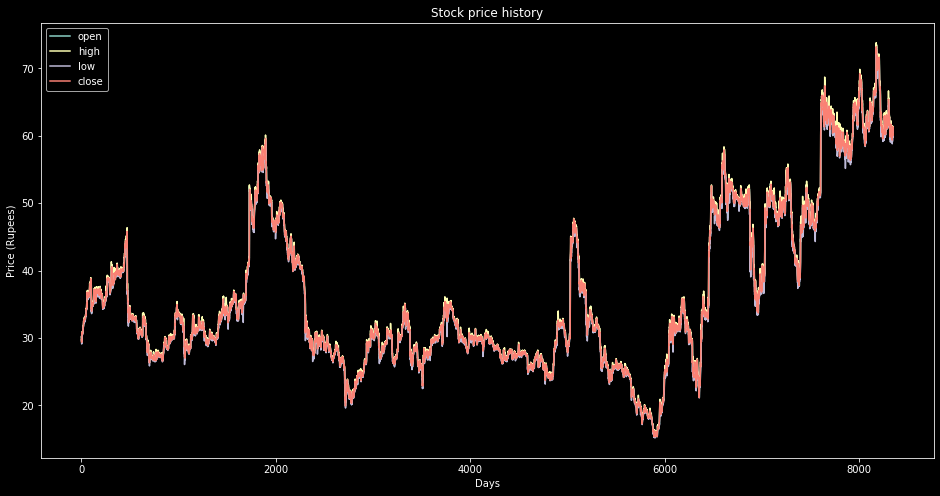

done


In [15]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(trainingDataDf["open"])
plt.plot(trainingDataDf["high"])
plt.plot(trainingDataDf["low"])
plt.plot(trainingDataDf["close"])
plt.title('Stock price history')
plt.ylabel('Price (Rupees)')
plt.xlabel('Days')
plt.legend(['open','high','low','close'], loc='upper left')
plt.show()
print('done')

checking if any null values are present
 open                      0
high                      0
low                       0
close                     0
green_red_vector_pow_2    0
                         ..
data_magnitude_pow_5      0
data_magnitude_pow_6      0
data_magnitude_pow_7      0
data_magnitude_pow_8      0
data_magnitude_pow_9      0
Length: 327, dtype: int64
Train and Test size 5010 3340
length of time-series i/o (4890, 120, 327) (4890, 4)
length of time-series i/o (3220, 120, 327) (3220, 4)
 checking if folder existis >>>/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/data/adani/processed/1h/features/shortlistedFeatures/logs
/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/data/adani/processed/1h/features/shortlistedFeatures/logs >>> Folder created
Train on 4608 samples, validate on 1536 samples
Epoch 1/40
 - 20s - loss: 0.1274 - accuracy: 0.2945 - val_loss: 0.1190 - val_accuracy: 0.0514
Epoch 2/40
 - 20s - loss: 0.0718 - accuracy: 0.1901 - val_loss:

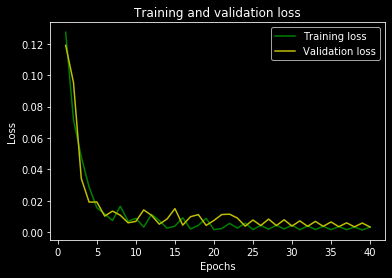

Error executing method >>> 
Traceback (most recent call last):
  File "/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/src/trainModel/trainModel.py", line 119, in trainLSTMModel
    acc = history.history['acc']
KeyError: 'acc'

Traceback (most recent call last):
  File "/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/src/trainModel/trainModel.py", line 119, in trainLSTMModel
KeyError: [<FrameSummary file /Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/src/trainModel/trainModel.py, line 119 in trainLSTMModel>]

isSuccess >>> False


<Figure size 432x288 with 0 Axes>

In [17]:
from trainModel.trainModel import trainLSTMModel
success, trainingData, min_max_scaler, x_t, y_t,x_test_t, y_test_t, lstm_model, history = \
    trainLSTMModel(trainingDataFilePath, TIME_STEPS_CONFIG, BATCH_SIZE_CONFIG , LEARNING_RATE_CONFIG, EPOCHS_CONFIG)
print('isSuccess >>> ' + str(success))

In [18]:
predicted_values = lstm_model.predict(x_test_t, batch_size=512)
predicted_values.shape

(1536, 4)

In [19]:
dummy_cols_data = np.random.random((predicted_values.shape[0],numberOfInputFeatures-numberOfOutputFeatures))
predicted_values_adj = np.append(predicted_values, dummy_cols_data, 1)
predicted_values_orig_scale_withDummies=min_max_scaler.inverse_transform(predicted_values_adj)

y_test_t_adj = np.append(y_test_t, dummy_cols_data, 1)
y_test_t_orig_scale_withDummies=min_max_scaler.inverse_transform(y_test_t_adj)
print('done')

done


In [20]:
predicted_values_orig_scale= predicted_values_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
y_test_t_orig_scale= y_test_t_orig_scale_withDummies[:, [i+1 for i in range(numberOfOutputFeatures)]] #[1,2,3,4]
predicted_values_orig_scale.shape

(1536, 4)

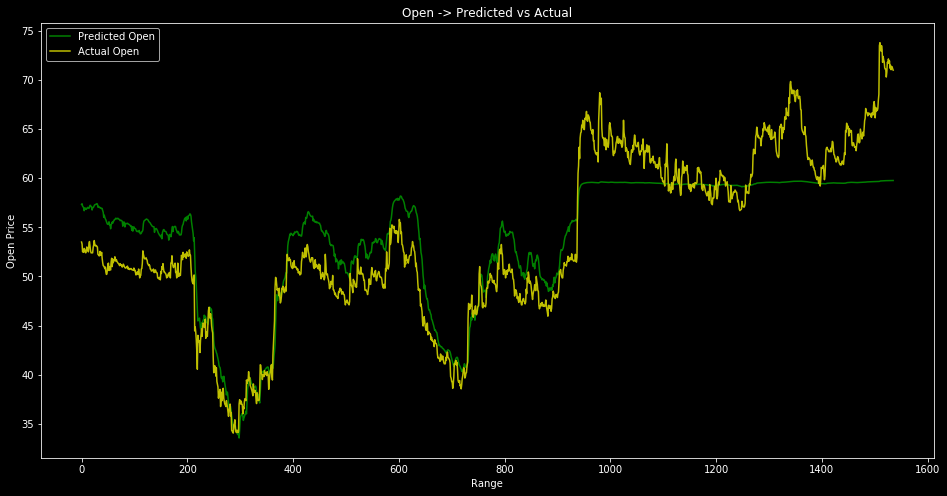

In [21]:
plt.figure(figsize=(16,8))
plt.clf()
predicted_open = predicted_values_orig_scale[:,[0]]
actual_open = y_test_t_orig_scale[:,[0]]

x_coord = [ index for index in range(predicted_values_orig_scale.shape[0]) ]

plt.plot(x_coord, predicted_open, 'g', label='Predicted Open')
plt.plot(x_coord, actual_open, 'y', label='Actual Open')
plt.title('Open -> Predicted vs Actual')
plt.xlabel('Range')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# Save trained model for future use

In [22]:
import pickle
from utilities.fileFolderManipulations import getParentFolder
from utilities.fileFolderManipulations import createFolder

modelFolderPath=getParentFolder(trainingDataFilePath)+"\model"
modelFilePath = modelFolderPath+"\lstm_model_for_"+trainingDataFilePath[trainingDataFilePath.rfind('\\')+1:trainingDataFilePath.rfind('.csv')]+".sav"
createFolder(modelFolderPath)

pickle.dump(lstm_model, open(modelFilePath, 'wb'))
print('done')

 checking if folder existis >>>/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/data/adani/processed/1h/features/shortlistedFeatures\model
/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/data/adani/processed/1h/features/shortlistedFeatures\model >>> Folder created


FileNotFoundError: [Errno 2] No such file or directory: '/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2/data/adani/processed/1h/features/shortlistedFeatures\\model\\lstm_model_for_/Users/493055/Desktop/dev/erai-v2.0/erai-v2.0/eraiVersion2//data/adani/processed/1h/features/shortlistedFeatures/shortlistedFeatures.sav'

# Load Model from disk

In [ ]:
import pickle
lstm_model_loaded = pickle.load(open(modelFil      ePath, 'rb'))
result = lstm_model_loaded.evaluate(x_t, y_t, batch_size=512)
actual = lstm_model.evaluate(x_t, y_t, batch_size=512)
print('done')
actual, result